In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation

import datetime

In [28]:
# Load Dataset

data = pd.read_csv('BTC-USD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,46820.492188,28160889722
1,2022-03-28,46821.851563,48086.835938,46690.203125,47128.003906,47128.003906,36362175703
2,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069
3,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962
4,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106


In [29]:
# Compute Middle Price
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices)/2

In [30]:
# Create Windows
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [31]:
# Normalize Data
normalized_data = []
for window in result:
    normalized_window = [((float(p)/float(window[0]))-1) for p in window]
    normalized_data.append(normalized_window)
    
result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0]*0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((284, 50, 1), (31, 50, 1))

In [32]:
# Build a Model
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Training
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=10,
          epochs=20)

Epoch 1/20
29/29 [==============================] - 15s 175ms/step - loss: 0.0098 - val_loss: 0.0127
Epoch 2/20
29/29 [==============================] - 2s 76ms/step - loss: 0.0048 - val_loss: 0.0124
Epoch 3/20
29/29 [==============================] - 2s 73ms/step - loss: 0.0041 - val_loss: 0.0088
Epoch 4/20
29/29 [==============================] - 2s 79ms/step - loss: 0.0038 - val_loss: 0.0090
Epoch 5/20
29/29 [==============================] - 2s 77ms/step - loss: 0.0034 - val_loss: 0.0073
Epoch 6/20
29/29 [==============================] - 2s 75ms/step - loss: 0.0031 - val_loss: 0.0088
Epoch 7/20
29/29 [==============================] - 2s 72ms/step - loss: 0.0029 - val_loss: 0.0064
Epoch 8/20
29/29 [==============================] - 2s 70ms/step - loss: 0.0028 - val_loss: 0.0105
Epoch 9/20
29/29 [==============================] - 2s 74ms/step - loss: 0.0025 - val_loss: 0.0071
Epoch 10/20
29/29 [==============================] - 3s 92ms/step - loss: 0.0024 - val_loss: 0.0077
Epoch 1

1/1 [==============================] - 2s 2s/step


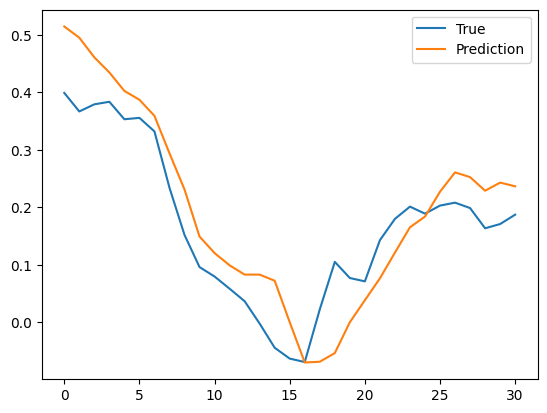

In [34]:
# Prediction
pred = model.predict(x_test)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()